In [25]:
import nltk

# Text Analytics and NLP

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\derek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import sent_tokenize

In [1]:
#retrieve test data

In [27]:
from urllib import request

In [28]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
text = response.read().decode('utf8')

In [93]:
 #Sentence Tokenization

In [29]:
tokenized_text=sent_tokenize(text)

In [4]:
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [22]:
#Word Tokenization

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
tokenized_word = word_tokenize(text)

In [7]:
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [99]:
#Frequency Distribution

In [32]:
from nltk.probability import FreqDist

In [33]:
fdist = FreqDist(tokenized_word)

In [34]:
print(fdist)

<FreqDist with 11539 samples and 257727 outcomes>


In [35]:
fdist.most_common(2)

[(',', 16178), ('.', 9589)]

In [12]:
##Frequenct Distribution Plot 

In [36]:
import matplotlib.pyplot as plt

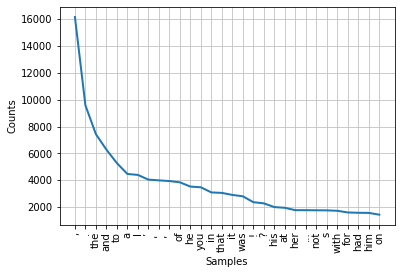

In [37]:
fdist.plot(30,cumulative=False)

In [15]:
#Stopwords

In [38]:
from nltk.corpus import stopwords

In [39]:
stop_words=set(stopwords.words("english"))

In [19]:
#Removing Stopwords

In [41]:
filtered_sent=[]
tokenized_sent = tokenized_word

In [42]:
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
#Lexicon Normalization 

In [54]:
##Stemming 

In [43]:
from nltk.stem import PorterStemmer

In [44]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [45]:
ps = PorterStemmer()

In [46]:
stemmed_words = []

In [47]:
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

In [63]:
#Lemmatization 

In [49]:
from nltk.stem.wordnet import WordNetLemmatizer

In [50]:
lem = WordNetLemmatizer()

In [51]:
from nltk.stem.porter import PorterStemmer

In [52]:
stem = PorterStemmer()

In [82]:
#POS Tagging 

In [60]:
tokens=nltk.word_tokenize(text)

# Sentiment Analysis 

In [127]:
#Perform Sentiment Analysis using Text Classification

In [63]:
import pandas as pd 

In [64]:
data=pd.read_csv('C://Users/derek/OneDrive/Documents/train.tsv', sep='\t')

In [65]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [67]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of Review')

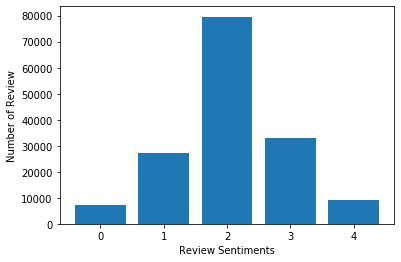

In [68]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values,Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')


In [37]:
#Feature Generation using Bag of Words (BoW)

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
from nltk.tokenize import RegexpTokenizer

In [71]:
token = RegexpTokenizer(r'[a-zA-Z0-9]')

In [72]:
cv = CountVectorizer(lowercase=True, stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)

In [73]:
text_counts= cv.fit_transform(data['Phrase'])

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [74]:
#Split train and test set 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(text_counts,data['Sentiment'],test_size=0.3,random_state=1)

In [46]:
#Model Building and Evaluation

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
from sklearn import metrics 

In [49]:
clf = MultinomialNB().fit(X_train,y_train)

In [50]:
predicted = clf.predict(X_test)

In [51]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.5089281900123884


In [52]:
#Feature Generation using TF-IDF
##TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tf = TfidfVectorizer()

In [55]:
text_tf = tf.fit_transform(data['Phrase'])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size=0.3,random_state=123)

In [58]:
clf=MultinomialNB().fit(X_train,y_train)

In [59]:
predicted=clf.predict(X_test)

In [60]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.5865265496176684
